In [1]:
import sys
sys.path.append("../")
import detect_organized as det
import roi
import display
import score
import trim

import cv2
import imutils
import skimage
from matplotlib import pyplot as plt
from skimage.color import rgb2gray

In [2]:
import numpy as np
from shapely.geometry import Polygon

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
im1_name = "../images/trailmix_parent_crop.jpg"
im2_name = "../images/trailmix_child.jpg"

In [5]:
img1 = skimage.io.imread(im1_name)
img1 = imutils.resize(img1, width=500)

img2 = skimage.io.imread(im2_name)
img2 = imutils.resize(img2, width=500)

In [6]:
master_img = img1
search_img = img2

In [7]:
boxes = roi.s_search(img2)

s_search start
s_search end


In [8]:
# img1 = skimage.io.imread("../images/screen.jpg")
img1 = cv2.imread(im1_name,0)
img1 = imutils.resize(img1, width=500)

# img2 = skimage.io.imread("../images/find_the_screen.jpg")
img2 = cv2.imread(im2_name,0)
img2 = imutils.resize(img2, width=500)

In [9]:
kp_master, rois = roi.check_roi_good(img1,img2,boxes,"surf", modus="bf", crosscheck=True)

In [10]:
len(boxes)

248

In [11]:
len(rois)

186

# Source/Master image

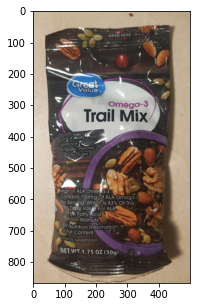

(<matplotlib.image.AxesImage at 0x7f10314d1588>, None)

In [12]:
plt.imshow(master_img),plt.show()

# Search/Child image

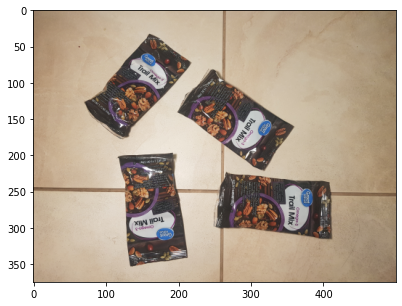

(<matplotlib.image.AxesImage at 0x7f103102c710>, None)

In [13]:
plt.imshow(search_img),plt.show()

# Selective Search

In [14]:
len(boxes)

248

In [15]:
len(rois)

186

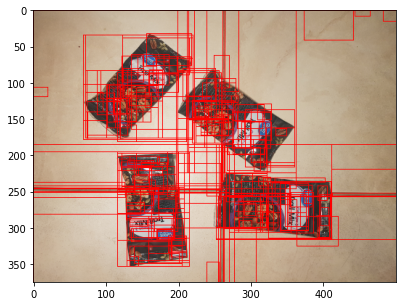

In [16]:
display.just_boxes(boxes,search_img)

We get rid of the boxes that have no features

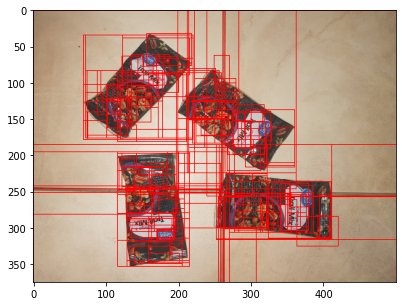

In [17]:
display.just_boxes([x[0] for x in rois],search_img)

# Basic cutoff

In [18]:
idxs_basic = score.basic_cutoff(rois, 110)

In [19]:
len(idxs_basic)

10

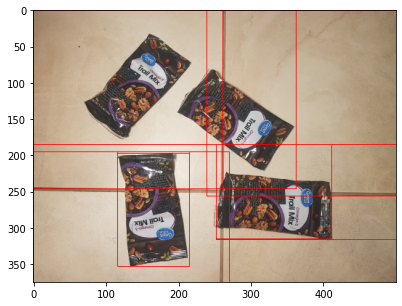

In [20]:
display.just_boxes_r(rois, search_img, idxs_basic)

# Homography

In [21]:
rois = trim.idx_trim(rois, idxs_basic)
_ = trim.homography_all(kp_master, master_img, search_img, rois)

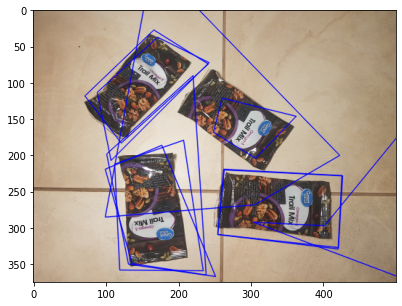

In [22]:
display.homography_boxes(rois, search_img)

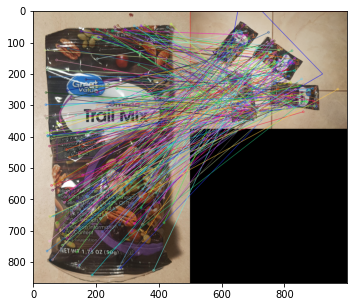

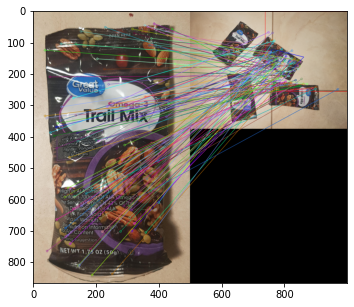

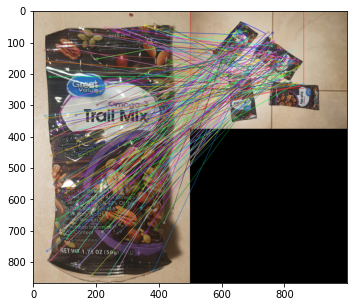

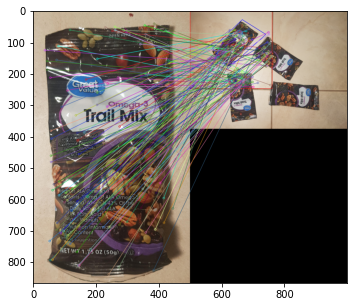

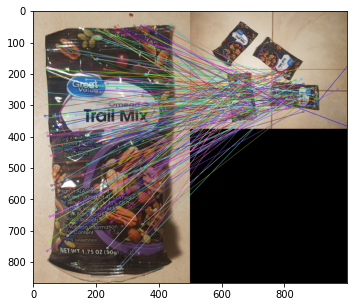

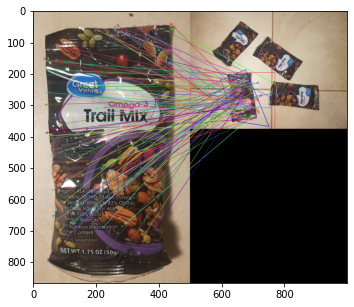

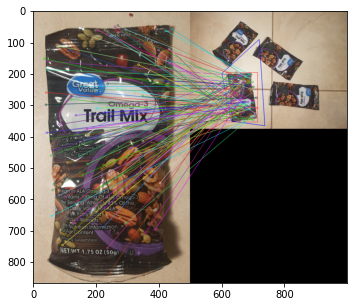

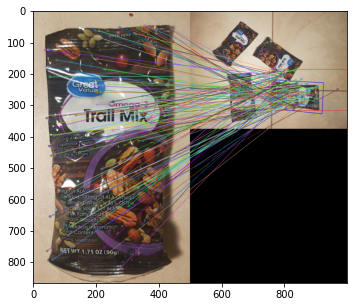

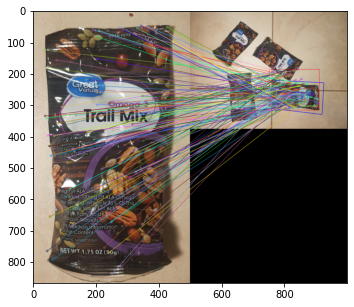

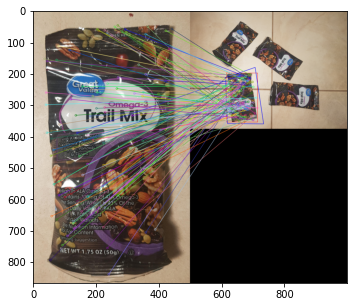

In [23]:
display.matchbox(kp_master, master_img, search_img, rois, homography = True)

# Homography Angle Cutoff

In [24]:
idxs_angle = score.angle_cutoff(rois, 35)

In [25]:
rois = trim.idx_trim(rois, idxs_angle)

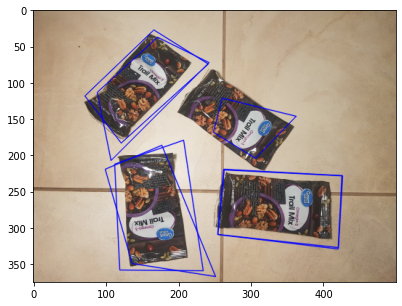

In [26]:
display.homography_boxes(rois, search_img)

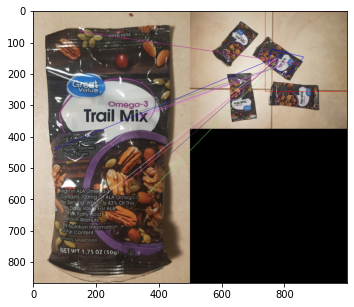

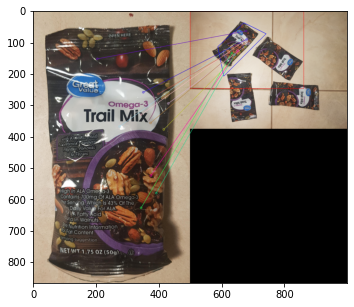

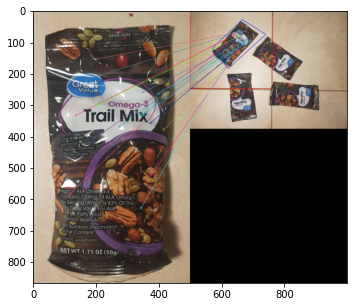

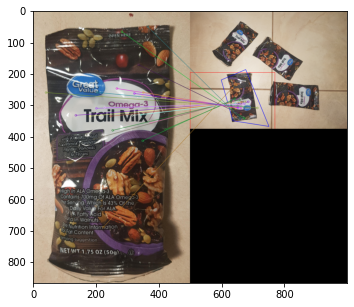

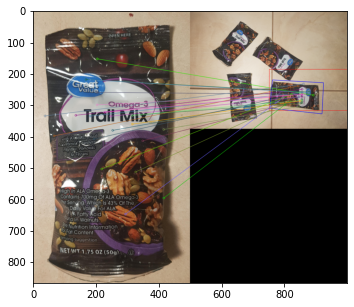

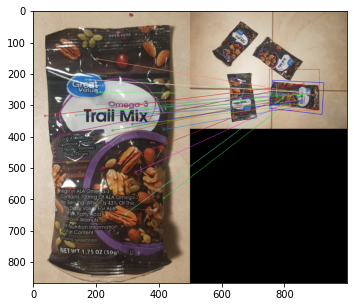

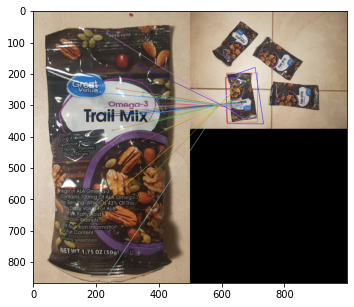

In [27]:
display.matchbox(kp_master, master_img, search_img, rois, homography=True, mmask=True)

In [28]:
print(img2.shape)

(375, 500)


In [29]:
rois[0][4]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [30]:
shape2 = rois[2][3]
shape1 = rois[1][3]

In [31]:
shape2 = [s[0] for s in shape2]
shape1 = [s[0] for s in shape1]

In [32]:
shape2

[array([166,  27], dtype=int32),
 array([ 71, 118], dtype=int32),
 array([121, 183], dtype=int32),
 array([241,  74], dtype=int32)]

In [33]:
shape1

[array([171,  37], dtype=int32),
 array([ 88, 113], dtype=int32),
 array([107, 207], dtype=int32),
 array([242,  72], dtype=int32)]

In [34]:
p1 = Polygon(shape2)
p2 = Polygon(shape1)
print(p1.intersects(p2))
p1.intersection(p2).area/p1.area

True


0.8638418483100708

Testing for one basic square

In [35]:
kp_master1, rois1 = roi.check_roi_good(img1,img2,[(10,10,490,365)]
,"surf")

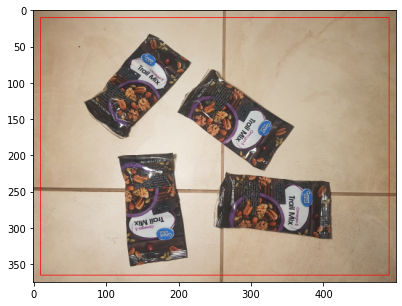

In [36]:
display.just_boxes([x[0] for x in rois1],search_img)

In [37]:
idxs1 = score.basic_cutoff(rois1, 10)

In [38]:
display.matchbox(kp_master1, master_img, search_img, rois1)

IndexError: list index out of range

In [ ]:
a = [0,1,2,3,4,5]
b = [0,4,5]
a[b]

In [ ]:
d = dict(a=a,bob=5)

In [ ]:
print(d)